<a href="https://colab.research.google.com/github/Akshay-Stat/Machine-Learning-with-Python/blob/master/Logistics_Regression_(credit_card).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Import libraries
import numpy as np                                 # Linear algebra
import pandas as pd                                 # Data processing or import data set in CSV format  (e.g. pd.read_csv)
import seaborn as sns                              # Data visualization library based on matplotlib
color = sns.color_palette()
import matplotlib.pyplot as plt               # Plotting library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics            # Run ML algorithm 
import warnings
warnings.filterwarnings("ignore")

### Import Dataset & Exploratory Data Analysis

In [ ]:
data = pd.read_csv("creditcard.csv")    # Read the credit card CSV file in the data

In [ ]:
display(data)      # Display the DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Since there are so many rows in the DataFrame, we see that most of the data is truncated. We can view just the first or last few entries in the DataFrame using the .head() and .tail() methods.

In [ ]:
data.head()                                            # The head() used to return top 5  rows of a data frame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()                                                  # The tail () function is used to get the last 5 rows 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.info()                                                  # To print a concise summary of a DataFrame / Prints information of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Describing the Data

In [ ]:
data.describe().round()
# Pandas describe() is used to view some basic statistical details like Count, Mean, Std, Percentile etc. of a data frame or a series of numeric values.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [ ]:
data.shape                              # Representing of how much rows & columns of the dataset

(284807, 31)

In [ ]:
data.dtypes.value_counts()     # How many different types of data types are present in a dataset

float64    30
int64       1
dtype: int64

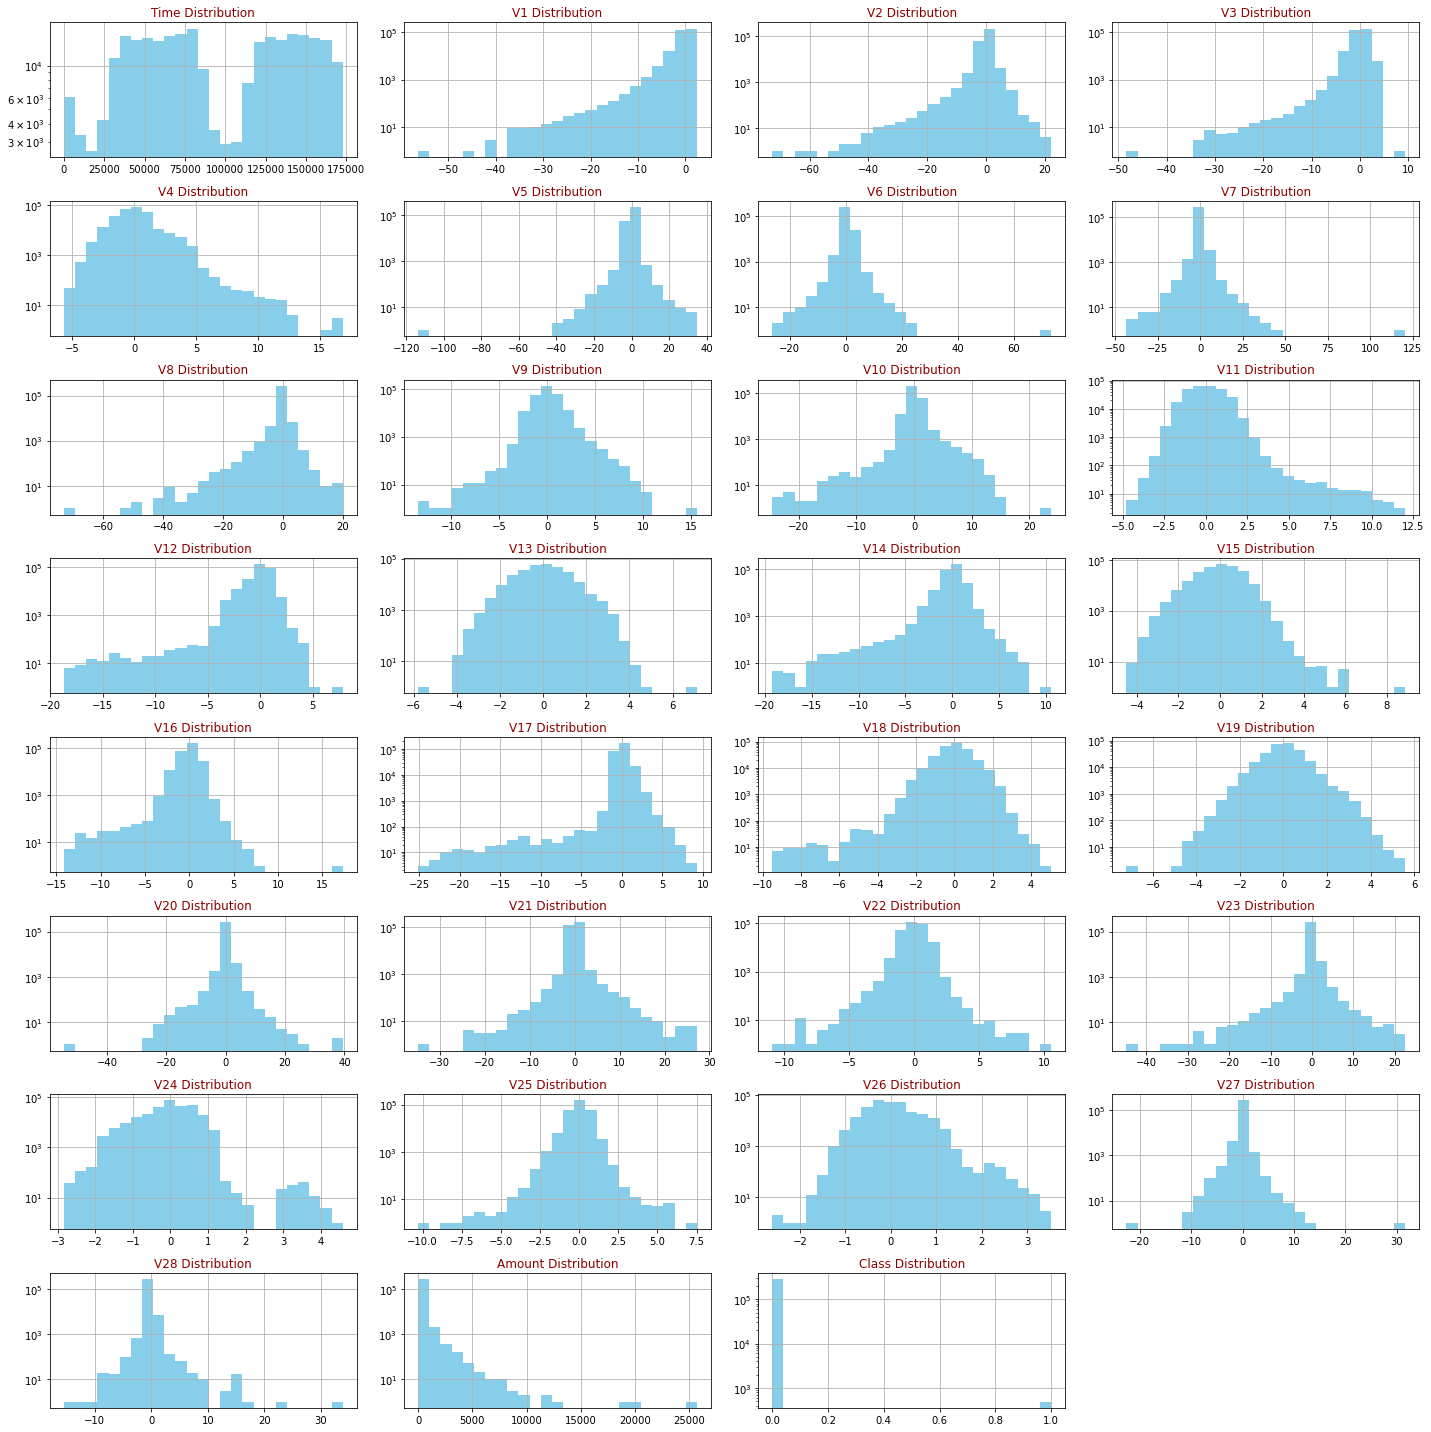

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=25, ax=ax, facecolor='SkyBlue')
        ax.set_title(feature+" Distribution", color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(data,data.columns,8,4)

In [ ]:
data.duplicated(keep = 'first').sum()

1081

In [ ]:
data[30:38]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30,24.0,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,17.28,0
31,25.0,1.114009,0.085546,0.493702,1.335760,-0.300189,-0.010754,-0.118760,0.188617,0.205687,...,-0.053234,-0.004760,-0.031470,0.198054,0.565007,-0.337718,0.029057,0.004453,4.45,0
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
36,27.0,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,0.138879,...,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,30.49,0
37,27.0,-1.452187,1.765124,0.611669,1.176825,-0.445980,0.246826,-0.257566,1.092472,-0.607524,...,0.082280,0.325782,-0.069107,0.020962,-0.044668,-0.243441,0.149180,0.120557,1.80,0


In [ ]:
data.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
data.duplicated().sum()

0

## Check for Missing Values

In [ ]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of normal transactions & fraudulent transactions

data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

This Dataset is highly unblanced

0 -- Normal Transaction

1 -- fraudulent transaction

In [ ]:
# separating the data for analysis
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]
outlierFraction = len(fraud)/float(len(normal))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


Only 0.16% fraudulent transaction out all the transactions. The data is highly Unbalanced.

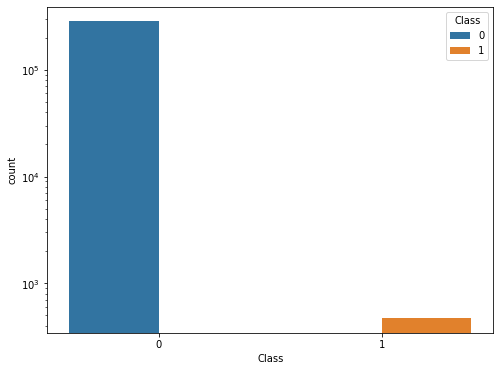

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data['Class'], hue = data['Class'], log = True);

In [ ]:
# statistical measures of the data
print("details of normal transaction")
normal.Amount.describe()

details of normal transaction


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


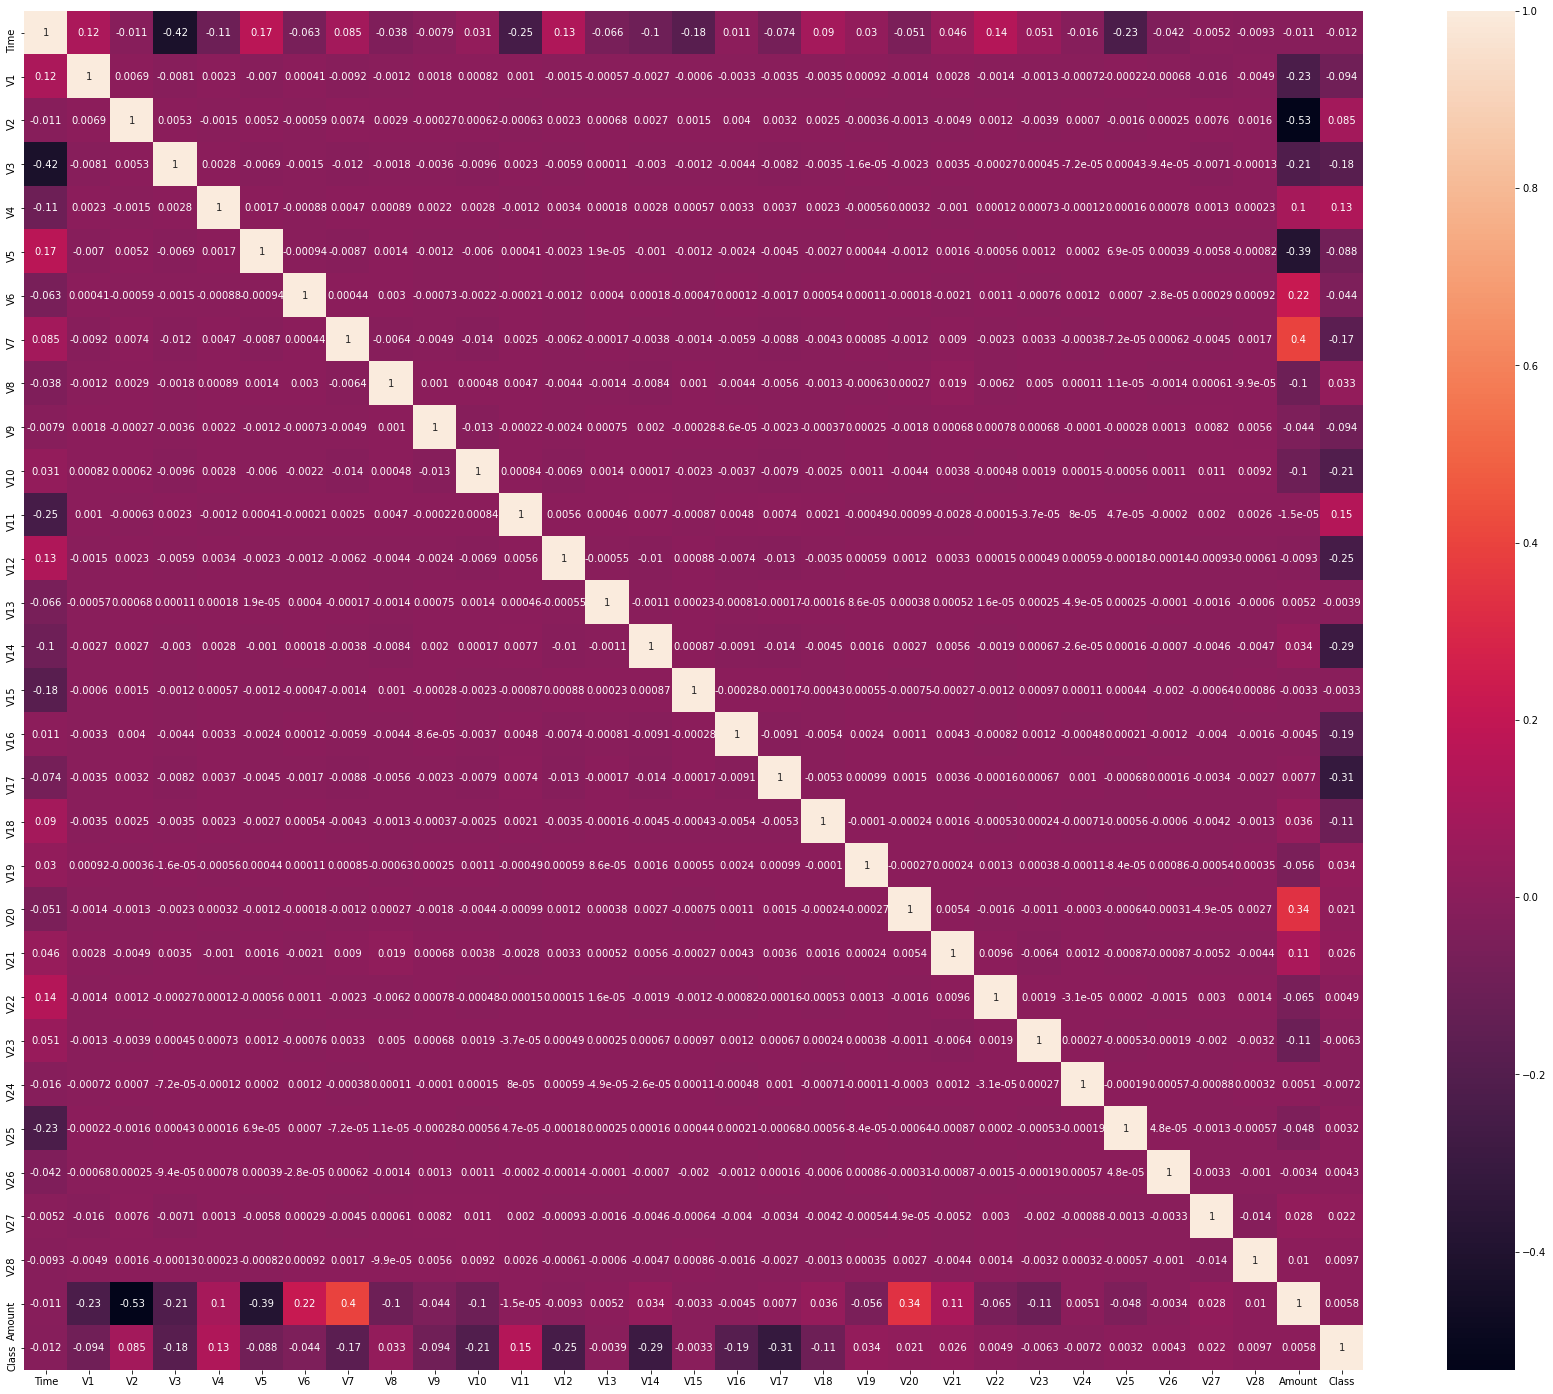

In [ ]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), annot=True, ax=ax);

#### Multicollinearity is Not Present in dataset

## Under-Sampling Technique

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions -- 473

In [ ]:
normal_sample = normal.sample(n=473)

### Concatenating:  Two DataFrames

In [ ]:
new_dataset = pd.concat([normal_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174636,121999.0,2.110728,0.241674,-2.206972,0.258220,0.860002,-0.674909,0.260125,-0.293260,0.520540,...,0.145693,0.585132,-0.091410,-0.022772,0.393785,-0.093976,-0.003475,-0.027066,8.30,0
283659,171769.0,-1.074237,-0.780975,0.923050,-2.200484,1.714383,-0.559763,0.140150,-0.183681,-1.744104,...,0.496835,1.145234,-0.517047,0.167682,1.114862,0.153041,-0.220888,-0.175295,26.80,0
170158,120044.0,2.054555,-0.122323,-1.245605,0.189486,0.132595,-0.620801,0.059449,-0.148032,0.338952,...,-0.271265,-0.686995,0.271657,-0.497125,-0.270079,0.208630,-0.076057,-0.075446,0.89,0
93393,64392.0,-0.356812,1.252279,1.043609,0.572943,0.310458,-1.258402,1.196490,-0.343139,-0.813408,...,0.116469,0.302575,-0.257892,0.730079,0.362036,-0.370551,-0.114966,0.017910,5.49,0
199324,132906.0,-0.906193,1.160427,0.695899,-0.638809,0.064750,-0.344450,0.830962,-1.991872,0.084315,...,1.283295,-0.969105,-0.646802,-0.093554,0.533163,0.622481,-0.087813,-0.292139,149.90,0


In [ ]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95811.186047,-0.128165,0.090366,0.037967,-0.047389,-0.049254,-0.060704,-0.027030,0.069756,0.064979,...,-0.006917,0.040348,0.035623,0.007811,0.002893,0.000524,-0.029078,-0.014035,-0.003067,77.115328
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


### Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
#print(X)
#print(Y)

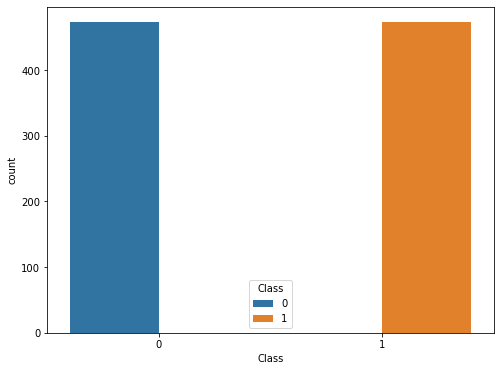

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(Y, hue = Y);

Split the Data into Training Data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=50)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


### Model Training

**Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

#### Accuracy Score 

In [ ]:
# accuracy on training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9087301587301587


In [ ]:
# accuracy on test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction)                 # model.score(X_test, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9210526315789473


In [ ]:
model.coef_

array([[-2.01969413e-05, -3.28626983e-01,  2.64464497e-01,
        -5.09226241e-01,  3.45553187e-01, -2.02503686e-01,
        -1.08891635e-01, -4.03088943e-01,  5.47076500e-02,
        -1.95913170e-01, -4.14446578e-01,  2.82567486e-01,
        -4.72108968e-01, -1.47660964e-02, -5.13939428e-01,
        -7.57564820e-03, -3.00289015e-01, -4.85138861e-01,
        -1.62486411e-01,  4.46619958e-02,  2.94212944e-02,
         2.70756790e-02,  7.08971825e-03, -3.09443719e-03,
        -9.55103548e-03,  1.22371323e-03,  5.39361705e-03,
         1.41450701e-02,  7.21634771e-03,  9.38877271e-04]])

In [ ]:
model.intercept_

array([0.00820903])

In [ ]:
cm = confusion_matrix(Y_test, Y_test_prediction)
print("confusion_matrix : ")
print(cm)
print("accuracy_score : ", accuracy_score(Y_test, Y_test_prediction))
print(classification_report(Y_test, Y_test_prediction))

confusion_matrix : 
[[89  6]
 [ 9 86]]
accuracy_score :  0.9210526315789473
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        95
           1       0.93      0.91      0.92        95

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



### AUROC (Area Under the Receiver Operating Characteristics)

Roc curve is used to measure the performance of a classifier model.

The ROC curve depicts the rate of true positives with respect to the rate of false positives.

Area covered by roc curve denotes how good your model. maximum area covered by roc curve is better for model.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
pred_value = model.predict(X_test)

In [ ]:
## predictind roc score.
auc = roc_auc_score(Y_test ,Y_test_prediction)
print("The accuracy is {}".format(auc))

The accuracy is 0.9210526315789475


In [ ]:
pred_value = model.predict_proba(X_test)
pred_value = pred_value[:, 1]
fpr,tpr,threshold = roc_curve(Y_test , Y_test_prediction)

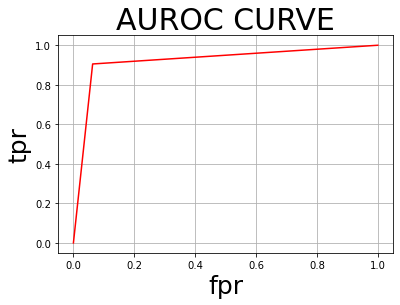

In [ ]:
## here we plot Auroc curve
plt.plot(fpr,tpr , color='r')
plt.xlabel("fpr",size=25)
plt.ylabel("tpr",size=25)
plt.title("AUROC CURVE",size=30)
plt.grid()